<a href="https://colab.research.google.com/github/gyuwonchoi/PytorchTutorial/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# img: load in NumPy -> torch.*Tensor
# img-lib: Pillow, OpenCV
# img-module: torchvision
    ## data loader, torchvision.datasets, torch.utils.data.DataLoader

1. torchvision으로 set 불로오고, 정규화
2. CNN의 정의
3. 손실 함수의 정의
4. 학습용 데이터로 학습
5. 테스트 데이터로 테스트

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

# output of torchvision dataset: [0,1] ranged PILImage -> need to normalize [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),  # R G B mean
                          (0.5, 0.5, 0.5))] # R G B std
)

batch_size=4

trainset= torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader= torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset= torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader= torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


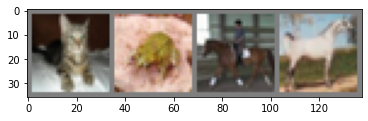

cat   frog  horse horse


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize :  mean 0.5, std 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
from os import XATTR_REPLACE
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5) # input channel, output channel, kernel size
    self.pool=nn.MaxPool2d(2,2)
    self.conv2= nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5, 120)
    self.fc2=nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self,x):
    x= self.pool(F.relu(self.conv1(x)))
    x= self.pool(F.relu(self.conv2(x)))
    x= torch.flatten(x,1)
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.fc3(x)
    return x

net=Net()
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [14]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()  # loss func
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # how to optimizer from loss